# Churn Modeling and Analysis

In [ ]:
import pandas as pd
import  numpy as np
from sklearn.linear_model import LogisticRegression
#from sklearn import preprocessing, cross_validation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
style.use('ggplot')
%matplotlib inline
import plotly.plotly as py
from sklearn.ensemble import RandomForestClassifier
import plotly.tools as tls
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

### Loading dataset

In [78]:
directory = "D:\churn_modeling"
churn_train_df = pd.read_csv(directory + "\dataset\churn.csv")
print(churn_train_df.shape)

(5000, 21)


### Understanding the data in dataset: Data Exploration 

Data exploration is the first step in data analysis and typically involves summarizing the main characteristics of a dataset. It is commonly conducted using visual analytics tools, but can also be done in more advanced statistical software.

We can do data exploration in Python, R which are advance statistical software.
In general and easy way is to use visual analytics tool/ reporting tools like PowerBI, Tableau, Zoho, Excel, etc.   

Step 1) Understand all the colums in dataset
  
This helps in identify the required features which should be used for modeling

Lets look at the headers in the data set




In [79]:
# state, -> They are state code (2 character)
# account length,
# area code,
# phone number, -> can be used as customer identifier (not part of feature)
# international plan, => yes no
# voice mail  plan,  => yes no
# number vmail messages,   -> vmail is voice-mail
# total day minutes,
# total day calls,
# total day charge,
# total eve minutes,
# total eve calls,
# total eve charge,
# total night minutes,
# total night calls,
# total night charge,
# total intl minutes,
# total intl calls,
# total intl charge,   intl -> international
# customer service calls, -> call made to customer service center
# churn -> Label which we need to predict in future


Step 2) Feature Analysis 
  
This helps in identify the required features, completeness of data, clearity of data, making statergy to improve data quality etc.  



In [80]:
# check the training set for any null value if any
print(churn_train_df.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     4
dtype: int64


In [81]:
# Now for this data set we don't have much null value so we don't have much issues with data completeness quality
# if in case we have some/many NULLs the we need to fill the NULLs with some value that depends on the type of data
# which we need to identify by going through data and understanding required pattern and fill missing data.
# There are many approach 
# 1) Manually adding required details from actual data gather from research 
# 2) We may replace by some aggregation 
# 3) We may fill with outlander  value such as -99999 if int or some default value
# Mostly try to fill the values if possible rather then removing those columns/ rows

# In our case only one value is missing from churn column which we can easily assume that that client has churned 

churn_train_df.churn.fillna('TRUE', inplace = True)


In [82]:
# Again check the training set for any null value if any
print(churn_train_df.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


### Preparing the data for research and modeling 

In [83]:
# First we need to convert our String labels to Numerical value ie  YES as 1 and NO as 0 likewise TRUE as 1, FALSE as 0
try:
    churn_train_df['voice mail plan'] = churn_train_df['voice mail plan'].replace(["yes", "no"], [1, 0])
    churn_train_df['international plan'] = churn_train_df['international plan'].replace(["yes", "no"], [1, 0])
    churn_train_df['churn'] = churn_train_df['churn'].replace(["TRUE", "FALSE"," TRUE", " FALSE"," TRUE ", " FALSE "],
                                                              [1,0,1,0,1,0])

    # converting boolean column to 1 AND 0
    churn_train_df.churn = churn_train_df.churn * 1
except TypeError:
    print("Already converted")

In [84]:
# Now need to convert state  to numeric as this my also play important role in data modeling
state_list = list(churn_train_df['state'].unique())
churn_train_df.state = churn_train_df.state.apply(state_list.index)

### We need to check how balance is this data set 

In [85]:
col = churn_train_df.columns.tolist()
print("people churn: {} %".format(round(float(len(churn_train_df[churn_train_df['churn'] == 1])) / len(churn_train_df) * 100), 3))

people churn: 14 %


#### The data set is unbalanced 

In [86]:
# Possible columns which we can consider as feature are state,international plan,voice mail plan,day calls,day charges
# eve calls,eve charges, night calls, night charges, intl calls,intl charges,customer service calls,num vmail messages

heads = ["state", "international plan", "voice mail plan", "number vmail messages", "total day calls",
                            "total day charge", "total eve calls", "total eve charge", "total night calls",
                            "total night charge", "total intl calls", "total intl charge","customer service calls",
                            "churn"]

train_set = churn_train_df[heads]


In [87]:
print(churn_train_df.head(3))

   state  account length  area code phone number  international plan  \
0      0             128        415     382-4657                   0   
1      1             107        415     371-7191                   0   
2      2             137        415     358-1921                   0   

   voice mail plan  number vmail messages  total day minutes  total day calls  \
0                1                     25              265.1              110   
1                1                     26              161.6              123   
2                0                      0              243.4              114   

   total day charge  ...    total eve calls  total eve charge  \
0             45.07  ...                 99             16.78   
1             27.47  ...                103             16.62   
2             41.38  ...                110             10.30   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.0

In [88]:
# Always Check if the data transformation happened as required  

print(churn_train_df['international plan'].unique())
print(churn_train_df['voice mail plan'].unique())
print(churn_train_df['churn'].unique())
print(churn_train_df['state'].unique())


[0 1]
[1 0]
[0 1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50]


## Understanding Data


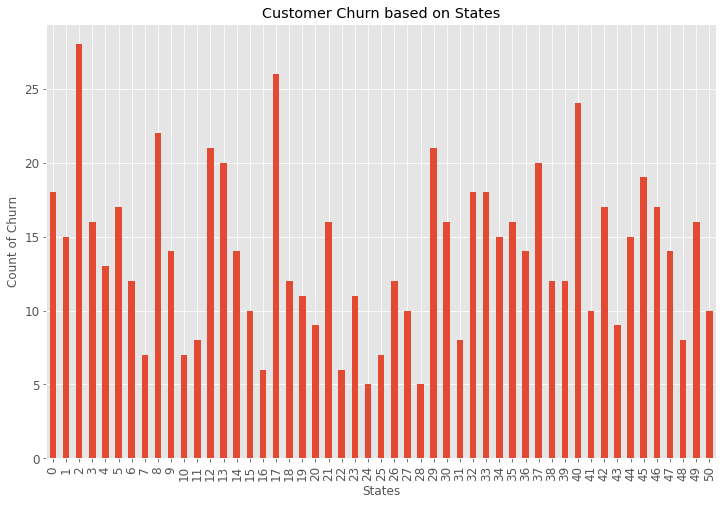

In [92]:
state_churn = train_set.groupby(['state', 'churn'], sort=True).size().reset_index(name='Count')

state_churn_0 = state_churn[state_churn['churn'] == 0].reset_index()
del state_churn_0['index']

state_churn_1 = state_churn[state_churn['churn'] == 1].reset_index()
del state_churn_1['index']

ax = state_churn_1['Count'].plot(kind='bar', title ="Customer Churn based on States", figsize=(12, 8), fontsize=12)
ax.set_xlabel("States", fontsize=12)
ax.set_ylabel("Count of Churn", fontsize=12)
plt.show()

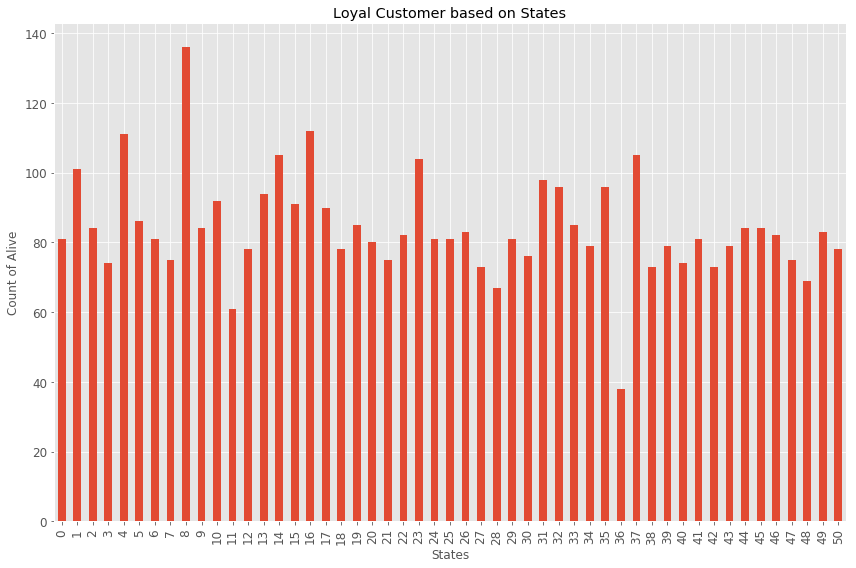

In [94]:

ax = state_churn_0['Count'].plot(kind='bar', title ="Loyal Customer based on States", figsize=(12, 8), fontsize=12)
ax.set_xlabel("States", fontsize=12)
ax.set_ylabel("Count of Alive", fontsize=12)
plt.tight_layout()

### Best way is to use some Visualization tools to quickly understand relations But we can also use matplotlib - python library to identify patterns.  

# Modeling using different available Models

### As it dataset is unbalanced so we can't completely depend on accuracy, as in worst case the accuracy of data set will give 86% accuracy due to  Accuracy paradox

### Linear Support Vector Classifier 

Accuracy:   0.8704


             precision    recall  f1-score   support

          0       0.88      0.99      0.93      2164
          1       0.62      0.09      0.16       336

avg / total       0.84      0.87      0.83      2500



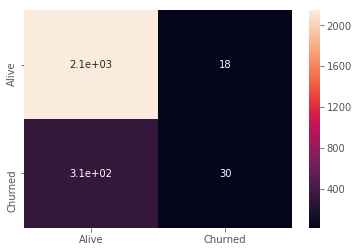

In [97]:
from sklearn.svm import LinearSVC

feature_names  = ["state", "international plan", "voice mail plan", "number vmail messages", "total day calls",
                            "total day charge", "total eve calls", "total eve charge", "total night calls",
                            "total night charge", "total intl calls", "total intl charge","customer service calls"]

clf_init = None
X_train, X_test, y_train, y_test = train_test_split(train_set[feature_names],train_set.churn, test_size=0.50,random_state=123456)
clf = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
clf.fit(X_train, y_train)
churn_col = ['Alive','Churned']
predicted = clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:   " + str(accuracy))
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns= churn_col, index=churn_col)
sns.heatmap(cm, annot=True)
print(metrics.classification_report(y_test, predicted))

# storing matix
svm_accuracy = metrics.accuracy_score(y_test, predicted)  
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
svm_classification_report = metrics.classification_report(y_test, predicted)  
svm_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
svm_recall = metrics.recall_score(y_test, predicted, pos_label=1)  
svm_f1 = metrics.f1_score(y_test, predicted, pos_label=1)


### Gaussian Naive Bayes Classifier 

Accuracy:   0.8704


             precision    recall  f1-score   support

          0       0.88      0.99      0.93      2164
          1       0.62      0.09      0.16       336

avg / total       0.84      0.87      0.83      2500



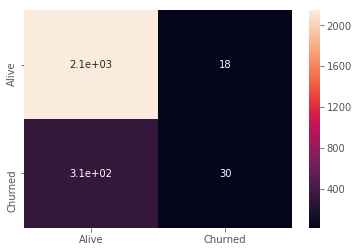

In [98]:
gnb = GaussianNB()
clf_init = None
X_train, X_test, y_train, y_test = train_test_split(train_set[feature_names],train_set.churn, test_size=0.50,random_state=123456)
gnb = GaussianNB()
y_train = y_train.astype('int')
y_test = y_test.astype('int')
gnb.fit(X_train, y_train)
churn_col = ['Alive','Churned']
predicted = clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:   " + str(accuracy))
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns= churn_col, index=churn_col)
sns.heatmap(cm, annot=True)
print(metrics.classification_report(y_test, predicted))

# storing matrix
bayes_accuracy = metrics.accuracy_score(y_test, predicted)  
bayes_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
bayes_classification_report = metrics.classification_report(y_test, predicted)  
bayes_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
bayes_recall = metrics.recall_score(y_test, predicted, pos_label=1)  
bayes_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

### Gradient Boosting Classifier


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.3304           0.3164            0.04s
         2           0.3211           0.0012            0.03s
         3           0.3135          -0.0384            0.02s
         4           0.4032          -0.0343            0.01s
         5           0.3441          -0.1633            0.01s
         6           0.4666          -0.0080            0.00s
Accuracy:   0.9056
             precision    recall  f1-score   support

          0       0.94      0.95      0.95      2164
          1       0.66      0.63      0.64       336

avg / total       0.90      0.91      0.90      2500


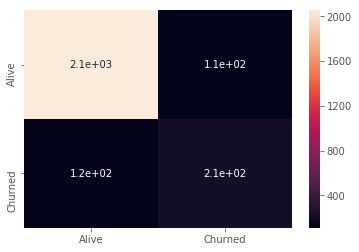

In [99]:
feature_names  = ["state", "international plan", "voice mail plan", "number vmail messages", "total day calls",
                            "total day charge", "total eve calls", "total eve charge", "total night calls",
                            "total night charge", "total intl calls", "total intl charge","customer service calls"]

clf_init = None
X_train, X_test, y_train, y_test = train_test_split(train_set[feature_names],train_set.churn, test_size=0.50,random_state=123456)

clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.5,
                             n_estimators=6, subsample=0.3,
                             min_samples_split=3,
                             min_samples_leaf=1,
                             max_depth=5,
                             init=clf_init,
                             random_state=None,
                             max_features=None,
                             verbose=2)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:   " + str(accuracy))
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns= churn_col, index=churn_col)
sns.heatmap(cm, annot=True)
print(metrics.classification_report(y_test, predicted))


# storing matrix
gbc_accuracy = metrics.accuracy_score(y_test, predicted)  
gbc_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
gbc_classification_report = metrics.classification_report(y_test, predicted)  
gbc_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
gbc_recall = metrics.recall_score(y_test, predicted, pos_label=1)  
gbc_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

### Logistic Regression as Classifier 

Accuracy:   0.8716


             precision    recall  f1-score   support

          0       0.89      0.98      0.93      2164
          1       0.57      0.19      0.28       336

avg / total       0.84      0.87      0.84      2500



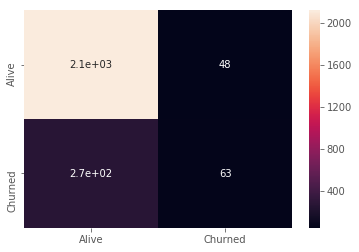

In [100]:
clf_init = LogisticRegression(penalty='l1', dual=False, tol=0.001, C=1.4, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=200, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
clf_init.fit(X_train, y_train)
predicted = clf_init.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:   " + str(accuracy))
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns= churn_col, index=churn_col)
sns.heatmap(cm, annot=True)
print(metrics.classification_report(y_test, predicted))

# Store metrics
lrf_accuracy = metrics.accuracy_score(y_test, predicted)  
lrf_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
lrf_classification_report = metrics.classification_report(y_test, predicted)  
lrf_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
lrf_recall = metrics.recall_score(y_test, predicted, pos_label=1)  
lrf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)


### Random Forest Classifier 

In [1]:
feature_names  = ["state", "international plan", "voice mail plan", "number vmail messages", "total day calls",
                            "total day charge", "total eve calls", "total eve charge", "total night calls",
                            "total night charge", "total intl calls", "total intl charge","customer service calls"]

X_train, X_test, y_train, y_test = train_test_split(train_set[feature_names],train_set.churn, test_size=0.55,random_state=123456)
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
rf.fit(X_train, y_train)
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print("Score Estimate:  " + str(rf.oob_score_))
print("Accuracy:   " + str(accuracy))
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns= churn_col, index=churn_col)
sns.heatmap(cm, annot=True)
print(metrics.classification_report(y_test, predicted))


# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)  
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
rf_classification_report = metrics.classification_report(y_test, predicted)  
rf_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
rf_recall = metrics.recall_score(y_test, predicted, pos_label=1)  
rf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

NameError: name 'train_test_split' is not defined

In [103]:
# Model comparison
model = dict({  
  'Model': np.array(['Logistic', 'GB', 'r.f.', 'SVC',  'Bayes']),
  'Accuracy' : np.array([lrf_accuracy, gbc_accuracy, rf_accuracy, svm_accuracy,  bayes_accuracy]),
  'Precision': np.array([lrf_precision, gbc_precision, rf_precision, svm_precision, bayes_precision]),
  'recall' : np.array([lrf_recall, gbc_recall, rf_recall, svm_recall,  bayes_recall]),
  'F1' : np.array([lrf_f1,gbc_f1,rf_f1, svm_f1,bayes_f1])
})
models = pd.DataFrame.from_dict(model, orient='index')
models = models.transpose()
# Print table and sort by test precision
print(models[['Model','Precision','Accuracy','recall','F1']].sort_values(by='F1', ascending=False))


      Model Precision  Accuracy     recall        F1
2      r.f.  0.941406  0.943273    0.63089  0.755486
1        GB   0.65528    0.9056   0.627976  0.641337
0  Logistic  0.567568    0.8716     0.1875  0.281879
3       SVC     0.625    0.8704  0.0892857   0.15625
4     Bayes     0.625    0.8704  0.0892857   0.15625


We found that Random Forest Classifier works the best amoung all, now we can check its performance by reducing the features  

Score Estimate:  0.94
Accuracy:   0.934909090909


             precision    recall  f1-score   support

          0       0.94      0.99      0.96      2368
          1       0.91      0.59      0.72       382

avg / total       0.93      0.93      0.93      2750



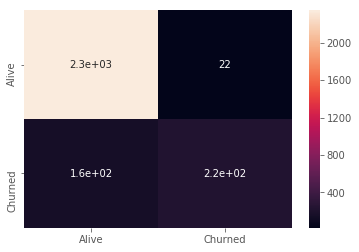

In [104]:
feature_names  = ["state", "international plan", "voice mail plan", "number vmail messages", "total day charge", "total eve charge", 
                            "total night charge",  "total intl charge","customer service calls"]

X_train, X_test, y_train, y_test = train_test_split(train_set[feature_names],train_set.churn, test_size=0.55,random_state=123456)
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
rf.fit(X_train, y_train)
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print("Score Estimate:  " + str(rf.oob_score_))
print("Accuracy:   " + str(accuracy))
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns= churn_col, index=churn_col)
sns.heatmap(cm, annot=True)
print(metrics.classification_report(y_test, predicted))

Looking at above result we can say initil selected of Features were correct

### Predicting the churn on unseen data

In [105]:
directory = "D:\churn_modeling"
churn_p_df = pd.read_csv(directory + "\dataset\check.csv")
final_df = pd.read_csv(directory + "\dataset\check.csv")
print(churn_p_df.isnull().sum())


state                       0
account length              0
area code                   0
phone number                0
international plan          0
voice mail plan             0
number vmail messages       0
total day minutes           0
total day calls             0
total day charge            0
total eve minutes           0
total eve calls             0
total eve charge            0
total night minutes         0
total night calls           0
total night charge          0
total intl minutes          0
total intl calls            0
total intl charge           0
customer service calls      0
                          335
dtype: int64


In [106]:
# First we need to convert our String labels to Numerical value ie  YES as 1 and NO as 0 
try:
    churn_p_df['voice mail plan'] = churn_p_df['voice mail plan'].replace([" yes", " no"], [1, 0])
    churn_p_df['international plan'] = churn_p_df['international plan'].replace([" yes", " no"], [1, 0])
    state_list = list(churn_p_df['state'].unique())
    churn_p_df.state = churn_p_df.state.apply(state_list.index)
    
except TypeError:
    print("Already converted")

In [107]:
heads = ["state", "international plan", "voice mail plan", "number vmail messages", "total day calls",
                            "total day charge", "total eve calls", "total eve charge", "total night calls",
                            "total night charge", "total intl calls", "total intl charge","customer service calls"]

p_set = churn_p_df[heads]

In [108]:
print(p_set.head(2))

   state  international plan  voice mail plan  number vmail messages  \
0      0                   0                0                      0   
1      1                   0                0                      0   

   total day calls  total day charge  total eve calls  total eve charge  \
0               70             35.90              122             21.48   
1               69             34.68              110             19.13   

   total night calls  total night charge  total intl calls  total intl charge  \
0                104               10.16                 3               3.32   
1                 85               10.81                 5               2.59   

   customer service calls  
0                       0  
1                       1  


### Predicting the churn 

In [110]:
# Rerun the required model: Random forest Classifier   
feature_names  = ["state", "international plan", "voice mail plan", "number vmail messages", "total day calls",
                            "total day charge", "total eve calls", "total eve charge", "total night calls",
                            "total night charge", "total intl calls", "total intl charge","customer service calls"]

X_train, X_test, y_train, y_test = train_test_split(train_set[feature_names],train_set.churn, test_size=0.55,random_state=123456)
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
rf.fit(X_train, y_train)
predicted = rf.predict(p_set)
final_df['churn'] = pd.Series(predicted, index=final_df.index)
print(final_df.head())


  state  account length  area code phone number international plan  \
0    CO              71        415     332-9896                 no   
1    KY              76        415     407-8575                 no   
2    NJ              87        510     387-2799                 no   
3    IL             117        408     373-9108                 no   
4    WA             177        415     345-3947                 no   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0              no                      0              211.2               70   
1              no                      0              204.0               69   
2              no                      0              223.2              109   
3              no                      0              119.0               82   
4              no                      0              266.1               91   

   total day charge  ...    total eve charge  total night minutes  \
0             35.90  ...     